Introduction:

The Great Recession of 2007-09 and its aftermath marked the start of a new era in American monetary policy. The Federal Reserve's policy rate was over 500 basis points prior to 2008. The policy rate dropped fast to 25 basis points in 2008, and has remained there ever since. Prior to 2008, the Federal Reserve's balance sheet was less than $1 trillion dollars, or around 7% of GDP (GDP). The Federal Reserve's security holdings and liabilities are currently approaching $4.5 trillion, or about 25% of GDP. Many analysts believe that the recent global financial crisis was caused by excessively expansionary monetary policy. For example, Taylor (2007) asserts that the Fed placed interest rates significantly below the optimal rate. Extremely low interest rates lowered borrowing costs, causing financial institutions to overleverage their balance sheets in the chase of higher profits. This entailed investing in risky assets, such as the well-known "toxic assets" (structured financial instruments), which provided high returns while maintaining good credit ratings. However, to overcome the crisis of 2008, in order to alleviate financial institutions' funding concerns and avert a credit crunch during difficult times, central banks worked hard to meet their liquidity demands by being as lender of last resort. Several measures taken to protect monetary policy transmission have resulted in considerable changes in the composition of central bank balance sheets. Fed moved beyond setting short-term interest rates between banks and implemented for the first time policies known as “quantitative easing” as well as was constrained itself by the “zero lower bound”. Central banks used alternative measures to bypass the limitations of traditional monetary policy like: asset purchase programs and forward guidance. Thus, through my project, I want to find out the effects on stock volatility due to change of monetary policy before and after financial crisis of 2008. To get the result, I will be using S&P 500 Index from Yahoo Finance and Balance Sheet data from Federal Reserve Economic Data with the help of Python. The link of the data source is: https://fred.stlouisfed.org/release/tables?rid=20&eid=1194154#snid=1194156

Objective:

The goal is to see the effects on stock volatility due to change of monetary policy before and after financial crisis of 2008.

Literature Review:

The impact of quantitative easing on stock prices has a wide range of opinions. Dobbs et al. (2013), for example, assert that there is insufficient evidence to back up widely held beliefsview that quantitative easing (QE) has boosted stock prices‘conventional wisdom regarding the consequences of quantitative easing on the economy'equities is almost certainly incorrect'. On the contrary, Newman (2012) claims that there is a "unmistakable association" between the Fed's QE initiatives and inflation. The stock market has been on a four-year winning streak'.

According to Hubble (2013), ‘when the Federal Reserve's balance sheet expands (QE), the stock market rises,' and that "after 2008, a stop in QE has led to a rise in the stock market. Thus, Stocks are dropping in value."Stock values, he argues, have surged since the Fed launched ‘QE Infinity at a rate of $85 billion per month' (meaning QE3).

According to Lenzner (2014), there is a one-to-one relationship between the Fed's securities purchases and stock prices. He talks on the Fed's "amazing achievement," which he says "would never have happened if the Fed hadn't been pouring $85 billion every month into Treasury securities and mortgage-backed bonds, which pushed down interest rates and pushed up bond and stock prices." QE worked well for Lenzner, who quotes Arbor Research's Jim Bianco as noting, "QE has been exceptionally helpful in raising stock values."

However, Ritholtz (2013) disagrees with Lenzner (2013)'s research, claiming that rising stock prices were caused by factors other than QE. He cites a number of reasons for his aversion to blaming the post-crisis stock market rise solely on QE. The first is that markets are extraordinarily complicated, involving a wide range of psychological, value, trend, and monetary factors. As a result, he claims that "there is almost never any one single factor that causes major market moves in either direction" and that "if you are willing to say the Fed is the cause of 100% of market gains, you are simultaneously implying that every other factor had a net zero impact," a claim that he disputes. Another argument opposing the idea that QE has a 100 percent effect on stock prices is market performance during secular bear markets, where he explicitly distinguishes between secular and cyclical stock price fluctuations. He also discusses earnings variability and the potential of timing being coincidental, implying the difference between correlation and causality. Alternative variables, in fact, are to blame for the market's rally after Donald Trump's win.

The pathways of causation — that is, how the effect is carried from asset purchases to stock prices – is an issue with multiple answers. Because QE is essentially an expansionary monetary policy, the relationship between QE and stock prices is the same as the relationship between the money supply and stock prices. However, because banks have been amassing reserves rather than lending out funds, the Fed's balance sheet expansion has not been accompanied by an equivalent or proportional increase in monetary aggregates. This may explain why Ross (2015) claims that QE has an effect on the stock market, although it is difficult to say how or to what amount. If causation goes from monetary expansion to stock prices, the fact that banks have not been growing credit, and hence the money supply, may be taken against the thesis that QE was ‘the' reason, or a key reason, for the stock market rebound.

According to Ross (2015), QE distorts financial prices because it entails price signal manipulation, which takes the shape of lower interest rates, more asset demand, and reduced money purchasing power. Instead of stock prices reflecting the true value of a firm and investor demand, manipulated prices force market participants to change their tactics to chase stocks that gain in value without their underlying companies being more valuable. Another way that QE affects stock prices is through this channel.

The goal of this study is to present empirical evidence on the impact of quantitative easing on stock prices.
While quantitative easing has powered the US stock market, the post-crisis rebound cannot be credited solely to this strategy, and the negative market of 2015, 2020 cannot be entirely explained in terms of the termination of QE. 

Data: 

To get the result, I will be using S&P 500 Index from Yahoo Finance and Balance Sheet data from Federal Reserve Economic Data.

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import io, base64, os, json, re
import pandas as pd
import pandas_datareader.data as web
import datetime
import numpy as np

import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

import matplotlib.transforms as mtransforms
import datetime
import math

In [2]:
def gather_data(data_codes, start, 
                end = datetime.datetime.today(), freq = "M"):
    i = 0
    # dct.items() calls key and value that key points to
    for key, val in data_codes.items():
        if i == 0:
            # Create dataframe for first variable, then rename column
            df = web.DataReader(val, "fred", start, end).resample(freq).mean()
            df.rename(columns = {val:key}, inplace = True) 
            # setting i to None will cause the next block of code to execute,
            # placing data within df instead of creating a new dataframe for
            # each variable
            i = None
        else:
            # If dataframe already exists, add new column
            df[key] = web.DataReader(val, "fred", start, end).resample(freq).mean()

    return df

In [3]:
data_codes  = {"Base: Total ($ Mil)": "BOGMBASE",
               "Base: Currency in Circulation ($ Mil)": "WCURCIR",
               # Assets
               "Balance Sheet: Total Assets ($ Mil)": "WALCL",
               "Balance Sheet Securities, Prem-Disc, Repos, and Loans ($ Mil)": "WSRLL",
               "Balance Sheet: Securities Held Outright ($ Mil)": "WSHOSHO",
               ### breakdown of securities holdings ###
               "Balance Sheet: U.S. Treasuries Held Outright ($ Mil)":"WSHOTSL",
               "Balance Sheet: Federal Agency Debt Securities ($ Mil)" : "WSHOFADSL",
               "Balance Sheet: Mortgage-Backed Securities ($ Mil)": "WSHOMCB",
               # other forms of lending
               "Balance Sheet: Repos ($ Mil)": "WORAL",
               "Balance Sheet: Central Bank Liquidity Swaps ($ Mil)" : "SWPT",
               "Balance Sheet: Direct Lending ($ Mil)" : "WLCFLL",
               # unamortized value of securities held (due to changes in interest rates)
               "Balance Sheet: Unamortized Security Premiums ($ Mil)": "WUPSHO",
               # Liabilities
               "Balance Sheet: Total Liabilities ($ Mil)" : "WLTLECL",
               "Balance Sheet: Federal Reserve Notes Outstanding ($ Mil)" : "WLFN",
               "Balance Sheet: Reverse Repos ($ Mil)": "WLRRAL",
               ### Major share of deposits 
               "Balance Sheet: Excess Reserves ($ Mil)": "EXCSRESNW",
               "Balance Sheet: Required Reserves ($ Mil)": "RESBALREQW",
               "Balance Sheet: Total Reserves ($ Mil)": "WRESBAL",
               "Balance Sheet: Deposits from Dep. Institutions ($ Mil)":"WLODLL",
               "Balance Sheet: U.S. Treasury General Account ($ Mil)": "WDTGAL",
               "Balance Sheet: Other Deposits ($ Mil)": "WOTHLB",
               "Balance Sheet: All Deposits ($ Mil)": "WLDLCL",
               # Interest Rates
               "Federal Funds Target (Pre-Crisis)": "DFEDTAR",
               "Federal Funds (Upper) Target":"DFEDTARU",
               "Effective Federal Funds Rate":"DFF",
               "Interest on Excess Reserves":"IOER",
               # Req Reserves and Vault Cash
               "Vault Cash ($ Mil)": "TLVAULTW",
               "Vault Cash Used as Req. ($ Mil)": "VAULT",
               }
               
# Select start and end dates
start = datetime.datetime(2000, 1, 1)
end = datetime.datetime.today()

# freq refers to data frequency. Choose "D", "W", "M", "Q", "A"
# a number may also be place in front of a letter. "2D" indicates
#       alternating days
fed_data = gather_data(data_codes = data_codes, start = start, 
                   end = end, freq = "M")

In [4]:
stock_data = web.DataReader('^GSPC', 'yahoo', start, end)

In [5]:
# Here I have stocked the data for S&P 500 index

stock_data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2000-01-03,1478.000000,1438.359985,1469.250000,1455.219971,931800000,1455.219971
2000-01-04,1455.219971,1397.430054,1455.219971,1399.420044,1009000000,1399.420044
2000-01-05,1413.270020,1377.680054,1399.420044,1402.109985,1085500000,1402.109985
2000-01-06,1411.900024,1392.099976,1402.109985,1403.449951,1092300000,1403.449951
2000-01-07,1441.469971,1400.729980,1403.449951,1441.469971,1225200000,1441.469971
...,...,...,...,...,...,...
2021-11-29,4672.950195,4625.259766,4628.750000,4655.270020,3471380000,4655.270020
2021-11-30,4646.020020,4560.000000,4640.250000,4567.000000,4950190000,4567.000000
2021-12-01,4652.939941,4510.270020,4602.819824,4513.040039,4078260000,4513.040039


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2000-01-03,1478.000000,1438.359985,1469.250000,1455.219971,931800000,1455.219971
2000-01-04,1455.219971,1397.430054,1455.219971,1399.420044,1009000000,1399.420044
2000-01-05,1413.270020,1377.680054,1399.420044,1402.109985,1085500000,1402.109985
2000-01-06,1411.900024,1392.099976,1402.109985,1403.449951,1092300000,1403.449951
2000-01-07,1441.469971,1400.729980,1403.449951,1441.469971,1225200000,1441.469971
...,...,...,...,...,...,...
2021-11-29,4672.950195,4625.259766,4628.750000,4655.270020,3471380000,4655.270020
2021-11-30,4646.020020,4560.000000,4640.250000,4567.000000,4950190000,4567.000000
2021-12-01,4652.939941,4510.270020,4602.819824,4513.040039,4078260000,4513.040039


In [6]:
#Here the data of FED Balance Sheet has been shown
fed_data

,Base: Total ($ Mil),Base: Currency in Circulation ($ Mil),Balance Sheet: Total Assets ($ Mil),"Balance Sheet Securities, Prem-Disc, Repos, and Loans ($ Mil)",Balance Sheet: Securities Held Outright ($ Mil),Balance Sheet: U.S. Treasuries Held Outright ($ Mil),Balance Sheet: Federal Agency Debt Securities ($ Mil),Balance Sheet: Mortgage-Backed Securities ($ Mil),Balance Sheet: Repos ($ Mil),Balance Sheet: Central Bank Liquidity Swaps ($ Mil),...,Balance Sheet: Deposits from Dep. Institutions ($ Mil),Balance Sheet: U.S. Treasury General Account ($ Mil),Balance Sheet: Other Deposits ($ Mil),Balance Sheet: All Deposits ($ Mil),Federal Funds Target (Pre-Crisis),Federal Funds (Upper) Target,Effective Federal Funds Rate,Interest on Excess Reserves,Vault Cash ($ Mil),Vault Cash Used as Req. ($ Mil)
DATE,,,,,,,,,,,,,,,,,,,,,
2000-01-31,601900.0,594.67875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.40850,NaN,5.500000,NaN,5.448387,NaN,72445.0,39.064
2000-02-29,578000.0,566.14375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.24300,NaN,5.741379,NaN,5.734828,NaN,69823.5,37.022
2000-03-31,577100.0,563.70500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.20940,NaN,5.838710,NaN,5.853548,NaN,49108.4,33.233
2000-04-30,578600.0,564.73350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.26750,NaN,6.000000,NaN,6.019667,NaN,46876.0,33.508
2000-05-31,580600.0,565.83560,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.25060,NaN,6.258065,NaN,6.268065,NaN,44636.4,33.894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-30,6027000.0,2178.84320,8026555.20,7874851.20,7450341.40,5149903.00,2347.0,2298091.20,0.0,516.0,...,3789613.40,767312.40,332.96560,4906226.60,NaN,0.25,0.078000,0.123333,NaN,NaN
2021-07-31,6130200.0,2186.12825,8190356.75,8042917.00,7617340.75,5232755.50,2347.0,2382238.75,0.0,487.0,...,3944127.75,633925.00,243.89825,4831987.25,NaN,0.25,0.098065,0.150000,NaN,NaN
2021-08-31,6328700.0,2187.63275,8291893.25,8153497.75,7733453.75,5312788.25,2347.0,2418318.75,0.0,446.0,...,4134706.50,366867.25,247.10875,4744682.50,NaN,0.25,0.092258,NaN,NaN,NaN


,Base: Total ($ Mil),Base: Currency in Circulation ($ Mil),Balance Sheet: Total Assets ($ Mil),"Balance Sheet Securities, Prem-Disc, Repos, and Loans ($ Mil)",Balance Sheet: Securities Held Outright ($ Mil),Balance Sheet: U.S. Treasuries Held Outright ($ Mil),Balance Sheet: Federal Agency Debt Securities ($ Mil),Balance Sheet: Mortgage-Backed Securities ($ Mil),Balance Sheet: Repos ($ Mil),Balance Sheet: Central Bank Liquidity Swaps ($ Mil),...,Balance Sheet: Deposits from Dep. Institutions ($ Mil),Balance Sheet: U.S. Treasury General Account ($ Mil),Balance Sheet: Other Deposits ($ Mil),Balance Sheet: All Deposits ($ Mil),Federal Funds Target (Pre-Crisis),Federal Funds (Upper) Target,Effective Federal Funds Rate,Interest on Excess Reserves,Vault Cash ($ Mil),Vault Cash Used as Req. ($ Mil)
DATE,,,,,,,,,,,,,,,,,,,,,
2000-01-31,601900.0,594.67875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.40850,NaN,5.500000,NaN,5.448387,NaN,72445.0,39.064
2000-02-29,578000.0,566.14375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.24300,NaN,5.741379,NaN,5.734828,NaN,69823.5,37.022
2000-03-31,577100.0,563.70500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.20940,NaN,5.838710,NaN,5.853548,NaN,49108.4,33.233
2000-04-30,578600.0,564.73350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.26750,NaN,6.000000,NaN,6.019667,NaN,46876.0,33.508
2000-05-31,580600.0,565.83560,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.25060,NaN,6.258065,NaN,6.268065,NaN,44636.4,33.894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-30,6027000.0,2178.84320,8026555.20,7874851.20,7450341.40,5149903.00,2347.0,2298091.20,0.0,516.0,...,3789613.40,767312.40,332.96560,4906226.60,NaN,0.25,0.078000,0.123333,NaN,NaN
2021-07-31,6130200.0,2186.12825,8190356.75,8042917.00,7617340.75,5232755.50,2347.0,2382238.75,0.0,487.0,...,3944127.75,633925.00,243.89825,4831987.25,NaN,0.25,0.098065,0.150000,NaN,NaN
2021-08-31,6328700.0,2187.63275,8291893.25,8153497.75,7733453.75,5312788.25,2347.0,2418318.75,0.0,446.0,...,4134706.50,366867.25,247.10875,4744682.50,NaN,0.25,0.092258,NaN,NaN,NaN


In [7]:
df_merged = fed_data.merge(stock_data, how='left', left_index=True, right_index=True)   #Left join based on the index (Dates)

In [8]:
df_merged = fed_data.merge(stock_data, how='left', left_index=True, right_index=True)   #Left join based on the index (Dates)
df_merged = df_merged.drop(['High', 'Low', 'Open', 'Close', 'Volume'], axis=1)
df_merged

,Base: Total ($ Mil),Base: Currency in Circulation ($ Mil),Balance Sheet: Total Assets ($ Mil),"Balance Sheet Securities, Prem-Disc, Repos, and Loans ($ Mil)",Balance Sheet: Securities Held Outright ($ Mil),Balance Sheet: U.S. Treasuries Held Outright ($ Mil),Balance Sheet: Federal Agency Debt Securities ($ Mil),Balance Sheet: Mortgage-Backed Securities ($ Mil),Balance Sheet: Repos ($ Mil),Balance Sheet: Central Bank Liquidity Swaps ($ Mil),...,Balance Sheet: U.S. Treasury General Account ($ Mil),Balance Sheet: Other Deposits ($ Mil),Balance Sheet: All Deposits ($ Mil),Federal Funds Target (Pre-Crisis),Federal Funds (Upper) Target,Effective Federal Funds Rate,Interest on Excess Reserves,Vault Cash ($ Mil),Vault Cash Used as Req. ($ Mil),Adj Close
DATE,,,,,,,,,,,,,,,,,,,,,
2000-01-31,601900.0,594.67875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.40850,NaN,5.500000,NaN,5.448387,NaN,72445.0,39.064,1394.459961
2000-02-29,578000.0,566.14375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.24300,NaN,5.741379,NaN,5.734828,NaN,69823.5,37.022,1366.420044
2000-03-31,577100.0,563.70500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.20940,NaN,5.838710,NaN,5.853548,NaN,49108.4,33.233,1498.579956
2000-04-30,578600.0,564.73350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.26750,NaN,6.000000,NaN,6.019667,NaN,46876.0,33.508,NaN
2000-05-31,580600.0,565.83560,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.25060,NaN,6.258065,NaN,6.268065,NaN,44636.4,33.894,1420.599976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-30,6027000.0,2178.84320,8026555.20,7874851.20,7450341.40,5149903.00,2347.0,2298091.20,0.0,516.0,...,767312.40,332.96560,4906226.60,NaN,0.25,0.078000,0.123333,NaN,NaN,4297.500000
2021-07-31,6130200.0,2186.12825,8190356.75,8042917.00,7617340.75,5232755.50,2347.0,2382238.75,0.0,487.0,...,633925.00,243.89825,4831987.25,NaN,0.25,0.098065,0.150000,NaN,NaN,NaN
2021-08-31,6328700.0,2187.63275,8291893.25,8153497.75,7733453.75,5312788.25,2347.0,2418318.75,0.0,446.0,...,366867.25,247.10875,4744682.50,NaN,0.25,0.092258,NaN,NaN,NaN,4522.680176


,Base: Total ($ Mil),Base: Currency in Circulation ($ Mil),Balance Sheet: Total Assets ($ Mil),"Balance Sheet Securities, Prem-Disc, Repos, and Loans ($ Mil)",Balance Sheet: Securities Held Outright ($ Mil),Balance Sheet: U.S. Treasuries Held Outright ($ Mil),Balance Sheet: Federal Agency Debt Securities ($ Mil),Balance Sheet: Mortgage-Backed Securities ($ Mil),Balance Sheet: Repos ($ Mil),Balance Sheet: Central Bank Liquidity Swaps ($ Mil),...,Balance Sheet: U.S. Treasury General Account ($ Mil),Balance Sheet: Other Deposits ($ Mil),Balance Sheet: All Deposits ($ Mil),Federal Funds Target (Pre-Crisis),Federal Funds (Upper) Target,Effective Federal Funds Rate,Interest on Excess Reserves,Vault Cash ($ Mil),Vault Cash Used as Req. ($ Mil),Adj Close
DATE,,,,,,,,,,,,,,,,,,,,,
2000-01-31,601900.0,594.67875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.40850,NaN,5.500000,NaN,5.448387,NaN,72445.0,39.064,1394.459961
2000-02-29,578000.0,566.14375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.24300,NaN,5.741379,NaN,5.734828,NaN,69823.5,37.022,1366.420044
2000-03-31,577100.0,563.70500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.20940,NaN,5.838710,NaN,5.853548,NaN,49108.4,33.233,1498.579956
2000-04-30,578600.0,564.73350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.26750,NaN,6.000000,NaN,6.019667,NaN,46876.0,33.508,NaN
2000-05-31,580600.0,565.83560,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.25060,NaN,6.258065,NaN,6.268065,NaN,44636.4,33.894,1420.599976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-30,6027000.0,2178.84320,8026555.20,7874851.20,7450341.40,5149903.00,2347.0,2298091.20,0.0,516.0,...,767312.40,332.96560,4906226.60,NaN,0.25,0.078000,0.123333,NaN,NaN,4297.500000
2021-07-31,6130200.0,2186.12825,8190356.75,8042917.00,7617340.75,5232755.50,2347.0,2382238.75,0.0,487.0,...,633925.00,243.89825,4831987.25,NaN,0.25,0.098065,0.150000,NaN,NaN,NaN
2021-08-31,6328700.0,2187.63275,8291893.25,8153497.75,7733453.75,5312788.25,2347.0,2418318.75,0.0,446.0,...,366867.25,247.10875,4744682.50,NaN,0.25,0.092258,NaN,NaN,NaN,4522.680176


In [9]:
# I have tried to merge the Fed data with S&P 500 index data
df_merged

,Base: Total ($ Mil),Base: Currency in Circulation ($ Mil),Balance Sheet: Total Assets ($ Mil),"Balance Sheet Securities, Prem-Disc, Repos, and Loans ($ Mil)",Balance Sheet: Securities Held Outright ($ Mil),Balance Sheet: U.S. Treasuries Held Outright ($ Mil),Balance Sheet: Federal Agency Debt Securities ($ Mil),Balance Sheet: Mortgage-Backed Securities ($ Mil),Balance Sheet: Repos ($ Mil),Balance Sheet: Central Bank Liquidity Swaps ($ Mil),...,Balance Sheet: U.S. Treasury General Account ($ Mil),Balance Sheet: Other Deposits ($ Mil),Balance Sheet: All Deposits ($ Mil),Federal Funds Target (Pre-Crisis),Federal Funds (Upper) Target,Effective Federal Funds Rate,Interest on Excess Reserves,Vault Cash ($ Mil),Vault Cash Used as Req. ($ Mil),Adj Close
DATE,,,,,,,,,,,,,,,,,,,,,
2000-01-31,601900.0,594.67875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.40850,NaN,5.500000,NaN,5.448387,NaN,72445.0,39.064,1394.459961
2000-02-29,578000.0,566.14375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.24300,NaN,5.741379,NaN,5.734828,NaN,69823.5,37.022,1366.420044
2000-03-31,577100.0,563.70500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.20940,NaN,5.838710,NaN,5.853548,NaN,49108.4,33.233,1498.579956
2000-04-30,578600.0,564.73350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.26750,NaN,6.000000,NaN,6.019667,NaN,46876.0,33.508,NaN
2000-05-31,580600.0,565.83560,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.25060,NaN,6.258065,NaN,6.268065,NaN,44636.4,33.894,1420.599976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-30,6027000.0,2178.84320,8026555.20,7874851.20,7450341.40,5149903.00,2347.0,2298091.20,0.0,516.0,...,767312.40,332.96560,4906226.60,NaN,0.25,0.078000,0.123333,NaN,NaN,4297.500000
2021-07-31,6130200.0,2186.12825,8190356.75,8042917.00,7617340.75,5232755.50,2347.0,2382238.75,0.0,487.0,...,633925.00,243.89825,4831987.25,NaN,0.25,0.098065,0.150000,NaN,NaN,NaN
2021-08-31,6328700.0,2187.63275,8291893.25,8153497.75,7733453.75,5312788.25,2347.0,2418318.75,0.0,446.0,...,366867.25,247.10875,4744682.50,NaN,0.25,0.092258,NaN,NaN,NaN,4522.680176


,Base: Total ($ Mil),Base: Currency in Circulation ($ Mil),Balance Sheet: Total Assets ($ Mil),"Balance Sheet Securities, Prem-Disc, Repos, and Loans ($ Mil)",Balance Sheet: Securities Held Outright ($ Mil),Balance Sheet: U.S. Treasuries Held Outright ($ Mil),Balance Sheet: Federal Agency Debt Securities ($ Mil),Balance Sheet: Mortgage-Backed Securities ($ Mil),Balance Sheet: Repos ($ Mil),Balance Sheet: Central Bank Liquidity Swaps ($ Mil),...,Balance Sheet: U.S. Treasury General Account ($ Mil),Balance Sheet: Other Deposits ($ Mil),Balance Sheet: All Deposits ($ Mil),Federal Funds Target (Pre-Crisis),Federal Funds (Upper) Target,Effective Federal Funds Rate,Interest on Excess Reserves,Vault Cash ($ Mil),Vault Cash Used as Req. ($ Mil),Adj Close
DATE,,,,,,,,,,,,,,,,,,,,,
2000-01-31,601900.0,594.67875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.40850,NaN,5.500000,NaN,5.448387,NaN,72445.0,39.064,1394.459961
2000-02-29,578000.0,566.14375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.24300,NaN,5.741379,NaN,5.734828,NaN,69823.5,37.022,1366.420044
2000-03-31,577100.0,563.70500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.20940,NaN,5.838710,NaN,5.853548,NaN,49108.4,33.233,1498.579956
2000-04-30,578600.0,564.73350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.26750,NaN,6.000000,NaN,6.019667,NaN,46876.0,33.508,NaN
2000-05-31,580600.0,565.83560,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.25060,NaN,6.258065,NaN,6.268065,NaN,44636.4,33.894,1420.599976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-30,6027000.0,2178.84320,8026555.20,7874851.20,7450341.40,5149903.00,2347.0,2298091.20,0.0,516.0,...,767312.40,332.96560,4906226.60,NaN,0.25,0.078000,0.123333,NaN,NaN,4297.500000
2021-07-31,6130200.0,2186.12825,8190356.75,8042917.00,7617340.75,5232755.50,2347.0,2382238.75,0.0,487.0,...,633925.00,243.89825,4831987.25,NaN,0.25,0.098065,0.150000,NaN,NaN,NaN
2021-08-31,6328700.0,2187.63275,8291893.25,8153497.75,7733453.75,5312788.25,2347.0,2418318.75,0.0,446.0,...,366867.25,247.10875,4744682.50,NaN,0.25,0.092258,NaN,NaN,NaN,4522.680176


In [10]:
df_merged.to_csv("merged.csv")

In [11]:
df_merged.isnull().sum()

Base: Total ($ Mil)                                                0
Base: Currency in Circulation ($ Mil)                              0
Balance Sheet: Total Assets ($ Mil)                               35
Balance Sheet Securities, Prem-Disc, Repos, and Loans ($ Mil)     35
Balance Sheet: Securities Held Outright ($ Mil)                   35
Balance Sheet: U.S. Treasuries Held Outright ($ Mil)              35
Balance Sheet: Federal Agency Debt Securities ($ Mil)             35
Balance Sheet: Mortgage-Backed Securities ($ Mil)                 35
Balance Sheet: Repos ($ Mil)                                      35
Balance Sheet: Central Bank Liquidity Swaps ($ Mil)               35
Balance Sheet: Direct Lending ($ Mil)                             35
Balance Sheet: Unamortized Security Premiums ($ Mil)              35
Balance Sheet: Total Liabilities ($ Mil)                          35
Balance Sheet: Federal Reserve Notes Outstanding ($ Mil)          35
Balance Sheet: Reverse Repos ($ Mi

Base: Total ($ Mil)                                                0
Base: Currency in Circulation ($ Mil)                              0
Balance Sheet: Total Assets ($ Mil)                               35
Balance Sheet Securities, Prem-Disc, Repos, and Loans ($ Mil)     35
Balance Sheet: Securities Held Outright ($ Mil)                   35
Balance Sheet: U.S. Treasuries Held Outright ($ Mil)              35
Balance Sheet: Federal Agency Debt Securities ($ Mil)             35
Balance Sheet: Mortgage-Backed Securities ($ Mil)                 35
Balance Sheet: Repos ($ Mil)                                      35
Balance Sheet: Central Bank Liquidity Swaps ($ Mil)               35
Balance Sheet: Direct Lending ($ Mil)                             35
Balance Sheet: Unamortized Security Premiums ($ Mil)              35
Balance Sheet: Total Liabilities ($ Mil)                          35
Balance Sheet: Federal Reserve Notes Outstanding ($ Mil)          35
Balance Sheet: Reverse Repos ($ Mi

In [12]:
## create a list of missing value

df_merged.dropna()

,Base: Total ($ Mil),Base: Currency in Circulation ($ Mil),Balance Sheet: Total Assets ($ Mil),"Balance Sheet Securities, Prem-Disc, Repos, and Loans ($ Mil)",Balance Sheet: Securities Held Outright ($ Mil),Balance Sheet: U.S. Treasuries Held Outright ($ Mil),Balance Sheet: Federal Agency Debt Securities ($ Mil),Balance Sheet: Mortgage-Backed Securities ($ Mil),Balance Sheet: Repos ($ Mil),Balance Sheet: Central Bank Liquidity Swaps ($ Mil),...,Balance Sheet: U.S. Treasury General Account ($ Mil),Balance Sheet: Other Deposits ($ Mil),Balance Sheet: All Deposits ($ Mil),Federal Funds Target (Pre-Crisis),Federal Funds (Upper) Target,Effective Federal Funds Rate,Interest on Excess Reserves,Vault Cash ($ Mil),Vault Cash Used as Req. ($ Mil),Adj Close
DATE,,,,,,,,,,,,,,,,,,,,,
2008-12-31,1666400.0,877.8834,2222737.4,1233658.0,493252.8,476134.6,17118.2,0.0,80000.0,555797.0,...,88723.0,13.574,1239918.2,1.0,0.25,0.155161,0.612903,55895.0,37.245,903.25


,Base: Total ($ Mil),Base: Currency in Circulation ($ Mil),Balance Sheet: Total Assets ($ Mil),"Balance Sheet Securities, Prem-Disc, Repos, and Loans ($ Mil)",Balance Sheet: Securities Held Outright ($ Mil),Balance Sheet: U.S. Treasuries Held Outright ($ Mil),Balance Sheet: Federal Agency Debt Securities ($ Mil),Balance Sheet: Mortgage-Backed Securities ($ Mil),Balance Sheet: Repos ($ Mil),Balance Sheet: Central Bank Liquidity Swaps ($ Mil),...,Balance Sheet: U.S. Treasury General Account ($ Mil),Balance Sheet: Other Deposits ($ Mil),Balance Sheet: All Deposits ($ Mil),Federal Funds Target (Pre-Crisis),Federal Funds (Upper) Target,Effective Federal Funds Rate,Interest on Excess Reserves,Vault Cash ($ Mil),Vault Cash Used as Req. ($ Mil),Adj Close
DATE,,,,,,,,,,,,,,,,,,,,,
2008-12-31,1666400.0,877.8834,2222737.4,1233658.0,493252.8,476134.6,17118.2,0.0,80000.0,555797.0,...,88723.0,13.574,1239918.2,1.0,0.25,0.155161,0.612903,55895.0,37.245,903.25


In [13]:
data_codes  = {"Base: Currency in Circulation ($ Mil)": "WCURCIR",
               "Balance Sheet: Total Assets ($ Mil)": "WALCL",
               "Effective Federal Funds Rate":"DFF"}

start = datetime.datetime(2000, 1, 1)
end = datetime.datetime.today()

# freq refers to data frequency. Choose "D", "W", "M", "Q", "A"
# a number may also be place in front of a letter. "2D" indicates
#       alternating days
fed_data = gather_data(data_codes = data_codes, start = start, 
                   end = end, freq = "M")

In [14]:
# From the Fed Balance Sheet, I have considered only the main three variables:  Currency in Circulation ($ Mil), Balance Sheet: Total Assets ($ Mil), Effective Federal Funds Rate

fed_data

,Base: Currency in Circulation ($ Mil),Balance Sheet: Total Assets ($ Mil),Effective Federal Funds Rate
DATE,,,
2000-01-31,594.67875,NaN,5.448387
2000-02-29,566.14375,NaN,5.734828
2000-03-31,563.70500,NaN,5.853548
2000-04-30,564.73350,NaN,6.019667
2000-05-31,565.83560,NaN,6.268065
...,...,...,...
2021-08-31,2187.63275,8291893.25,0.092258
2021-09-30,2194.90300,8418612.40,0.079333
2021-10-31,2202.50650,8516524.50,0.079032


,Base: Currency in Circulation ($ Mil),Balance Sheet: Total Assets ($ Mil),Effective Federal Funds Rate
DATE,,,
2000-01-31,594.67875,NaN,5.448387
2000-02-29,566.14375,NaN,5.734828
2000-03-31,563.70500,NaN,5.853548
2000-04-30,564.73350,NaN,6.019667
2000-05-31,565.83560,NaN,6.268065
...,...,...,...
2021-08-31,2187.63275,8291893.25,0.092258
2021-09-30,2194.90300,8418612.40,0.079333
2021-10-31,2202.50650,8516524.50,0.079032


In [15]:
df_merged = fed_data.merge(stock_data, how='left', left_index=True, right_index=True)   #Left join based on the index (Dates)

In [16]:
df_merged = df_merged.drop(['High', 'Low', 'Open', 'Close', 'Volume'], axis=1)

In [17]:
#  I have tried to merge the three variables of Fed data with S&P 500 index data of "Adj Close"

df_merged

,Base: Currency in Circulation ($ Mil),Balance Sheet: Total Assets ($ Mil),Effective Federal Funds Rate,Adj Close
DATE,,,,
2000-01-31,594.67875,NaN,5.448387,1394.459961
2000-02-29,566.14375,NaN,5.734828,1366.420044
2000-03-31,563.70500,NaN,5.853548,1498.579956
2000-04-30,564.73350,NaN,6.019667,NaN
2000-05-31,565.83560,NaN,6.268065,1420.599976
...,...,...,...,...
2021-08-31,2187.63275,8291893.25,0.092258,4522.680176
2021-09-30,2194.90300,8418612.40,0.079333,4307.540039
2021-10-31,2202.50650,8516524.50,0.079032,NaN


,Base: Currency in Circulation ($ Mil),Balance Sheet: Total Assets ($ Mil),Effective Federal Funds Rate,Adj Close
DATE,,,,
2000-01-31,594.67875,NaN,5.448387,1394.459961
2000-02-29,566.14375,NaN,5.734828,1366.420044
2000-03-31,563.70500,NaN,5.853548,1498.579956
2000-04-30,564.73350,NaN,6.019667,NaN
2000-05-31,565.83560,NaN,6.268065,1420.599976
...,...,...,...,...
2021-08-31,2187.63275,8291893.25,0.092258,4522.680176
2021-09-30,2194.90300,8418612.40,0.079333,4307.540039
2021-10-31,2202.50650,8516524.50,0.079032,NaN


In [18]:
df_merged.isnull().sum()

Base: Currency in Circulation ($ Mil)     0
Balance Sheet: Total Assets ($ Mil)      35
Effective Federal Funds Rate              0
Adj Close                                79
dtype: int64

Base: Currency in Circulation ($ Mil)     0
Balance Sheet: Total Assets ($ Mil)      35
Effective Federal Funds Rate              0
Adj Close                                79
dtype: int64

In [19]:
data_new1 = df_merged.fillna(0)                                 # Substitute NaN in all columns
print(data_new1)                                           # Print DataFrame with zeros

            Base: Currency in Circulation ($ Mil)  \
DATE                                                
2000-01-31                              594.67875   
2000-02-29                              566.14375   
2000-03-31                              563.70500   
2000-04-30                              564.73350   
2000-05-31                              565.83560   
...                                           ...   
2021-08-31                             2187.63275   
2021-09-30                             2194.90300   
2021-10-31                             2202.50650   
2021-11-30                             2211.68875   
2021-12-31                             2220.81900   

            Balance Sheet: Total Assets ($ Mil)  Effective Federal Funds Rate  \
DATE                                                                            
2000-01-31                                 0.00                      5.448387   
2000-02-29                                 0.00                    

In [20]:
data_new1.to_csv("datamerged.csv")

In [21]:
data_updated = pd.read_csv("datamerged_updated.csv")

In [49]:
data = pd.read_csv("data.csv")

In [50]:
data

,Date,Base: Currency in Circulation ($ Mil),Balance Sheet: Total Assets ($ Mil),Effective Federal Funds Rate,Adj Close,Log Total Asset,Currency in Circulation/Total Asset,Log Stock Price
0,1/31/2000,594.68,0.00,5.45,1394.46,0.000000,0.000000,7.240263
1,2/29/2000,566.14,0.00,5.73,1366.42,0.000000,0.000000,7.219949
2,3/31/2000,563.71,0.00,5.85,1498.58,0.000000,0.000000,7.312273
3,4/30/2000,564.73,0.00,6.02,1452.43,0.000000,1.000000,7.280993
4,5/31/2000,565.84,0.00,6.27,1420.60,0.000000,0.000000,7.258835
...,...,...,...,...,...,...,...,...
258,7/31/2021,2186.13,8190356.75,0.10,4395.26,15.918468,0.000267,8.388282
259,8/31/2021,2187.63,8291893.25,0.09,4522.68,15.930789,0.000264,8.416860
260,9/30/2021,2194.90,8418612.40,0.08,4307.54,15.945956,0.000261,8.368122
261,10/31/2021,2202.51,8516524.50,0.08,4605.38,15.957519,0.000259,8.434980


,Date,Base: Currency in Circulation ($ Mil),Balance Sheet: Total Assets ($ Mil),Effective Federal Funds Rate,Adj Close,Log Total Asset,Currency in Circulation/Total Asset,Log Stock Price
0,1/31/2000,594.68,0.00,5.45,1394.46,0.000000,0.000000,7.240263
1,2/29/2000,566.14,0.00,5.73,1366.42,0.000000,0.000000,7.219949
2,3/31/2000,563.71,0.00,5.85,1498.58,0.000000,0.000000,7.312273
3,4/30/2000,564.73,0.00,6.02,1452.43,0.000000,1.000000,7.280993
4,5/31/2000,565.84,0.00,6.27,1420.60,0.000000,0.000000,7.258835
...,...,...,...,...,...,...,...,...
258,7/31/2021,2186.13,8190356.75,0.10,4395.26,15.918468,0.000267,8.388282
259,8/31/2021,2187.63,8291893.25,0.09,4522.68,15.930789,0.000264,8.416860
260,9/30/2021,2194.90,8418612.40,0.08,4307.54,15.945956,0.000261,8.368122
261,10/31/2021,2202.51,8516524.50,0.08,4605.38,15.957519,0.000259,8.434980


In [55]:
data.dtypes # This will show the type of each column

Base: Currency in Circulation ($ Mil)    float64
Balance Sheet: Total Assets ($ Mil)      float64
Effective Federal Funds Rate             float64
Adj Close                                float64
Log Total Asset                          float64
Currency in Circulation/Total Asset      float64
Log Stock Price                          float64
dtype: object

Base: Currency in Circulation ($ Mil)    float64
Balance Sheet: Total Assets ($ Mil)      float64
Effective Federal Funds Rate             float64
Adj Close                                float64
Log Total Asset                          float64
Currency in Circulation/Total Asset      float64
Log Stock Price                          float64
dtype: object

In [53]:
# set the index to the date column
data= data.set_index('Date')

In [54]:
data

,Base: Currency in Circulation ($ Mil),Balance Sheet: Total Assets ($ Mil),Effective Federal Funds Rate,Adj Close,Log Total Asset,Currency in Circulation/Total Asset,Log Stock Price
Date,,,,,,,
1/31/2000,594.68,0.00,5.45,1394.46,0.000000,0.000000,7.240263
2/29/2000,566.14,0.00,5.73,1366.42,0.000000,0.000000,7.219949
3/31/2000,563.71,0.00,5.85,1498.58,0.000000,0.000000,7.312273
4/30/2000,564.73,0.00,6.02,1452.43,0.000000,1.000000,7.280993
5/31/2000,565.84,0.00,6.27,1420.60,0.000000,0.000000,7.258835
...,...,...,...,...,...,...,...
7/31/2021,2186.13,8190356.75,0.10,4395.26,15.918468,0.000267,8.388282
8/31/2021,2187.63,8291893.25,0.09,4522.68,15.930789,0.000264,8.416860
9/30/2021,2194.90,8418612.40,0.08,4307.54,15.945956,0.000261,8.368122


,Base: Currency in Circulation ($ Mil),Balance Sheet: Total Assets ($ Mil),Effective Federal Funds Rate,Adj Close,Log Total Asset,Currency in Circulation/Total Asset,Log Stock Price
Date,,,,,,,
1/31/2000,594.68,0.00,5.45,1394.46,0.000000,0.000000,7.240263
2/29/2000,566.14,0.00,5.73,1366.42,0.000000,0.000000,7.219949
3/31/2000,563.71,0.00,5.85,1498.58,0.000000,0.000000,7.312273
4/30/2000,564.73,0.00,6.02,1452.43,0.000000,1.000000,7.280993
5/31/2000,565.84,0.00,6.27,1420.60,0.000000,0.000000,7.258835
...,...,...,...,...,...,...,...
7/31/2021,2186.13,8190356.75,0.10,4395.26,15.918468,0.000267,8.388282
8/31/2021,2187.63,8291893.25,0.09,4522.68,15.930789,0.000264,8.416860
9/30/2021,2194.90,8418612.40,0.08,4307.54,15.945956,0.000261,8.368122


In [56]:
data.isnull().sum()

Base: Currency in Circulation ($ Mil)    0
Balance Sheet: Total Assets ($ Mil)      0
Effective Federal Funds Rate             0
Adj Close                                0
Log Total Asset                          0
Currency in Circulation/Total Asset      0
Log Stock Price                          0
dtype: int64

Base: Currency in Circulation ($ Mil)    0
Balance Sheet: Total Assets ($ Mil)      0
Effective Federal Funds Rate             0
Adj Close                                0
Log Total Asset                          0
Currency in Circulation/Total Asset      0
Log Stock Price                          0
dtype: int64

In [59]:
data_new = data.drop(['Base: Currency in Circulation ($ Mil)', 'Balance Sheet: Total Assets ($ Mil)', 'Adj Close'], axis=1)

In [60]:
data_new

,Effective Federal Funds Rate,Log Total Asset,Currency in Circulation/Total Asset,Log Stock Price
Date,,,,
1/31/2000,5.45,0.000000,0.000000,7.240263
2/29/2000,5.73,0.000000,0.000000,7.219949
3/31/2000,5.85,0.000000,0.000000,7.312273
4/30/2000,6.02,0.000000,1.000000,7.280993
5/31/2000,6.27,0.000000,0.000000,7.258835
...,...,...,...,...
7/31/2021,0.10,15.918468,0.000267,8.388282
8/31/2021,0.09,15.930789,0.000264,8.416860
9/30/2021,0.08,15.945956,0.000261,8.368122


,Effective Federal Funds Rate,Log Total Asset,Currency in Circulation/Total Asset,Log Stock Price
Date,,,,
1/31/2000,5.45,0.000000,0.000000,7.240263
2/29/2000,5.73,0.000000,0.000000,7.219949
3/31/2000,5.85,0.000000,0.000000,7.312273
4/30/2000,6.02,0.000000,1.000000,7.280993
5/31/2000,6.27,0.000000,0.000000,7.258835
...,...,...,...,...
7/31/2021,0.10,15.918468,0.000267,8.388282
8/31/2021,0.09,15.930789,0.000264,8.416860
9/30/2021,0.08,15.945956,0.000261,8.368122


In [61]:
# to check the correlationship

corr = data_new.corr()
print(corr)

                                     Effective Federal Funds Rate  \
Effective Federal Funds Rate                             1.000000   
Log Total Asset                                         -0.556184   
Currency in Circulation/Total Asset                      0.148054   
Log Stock Price                                         -0.199287   

                                     Log Total Asset  \
Effective Federal Funds Rate               -0.556184   
Log Total Asset                             1.000000   
Currency in Circulation/Total Asset        -0.561001   
Log Stock Price                             0.380802   

                                     Currency in Circulation/Total Asset  \
Effective Federal Funds Rate                                    0.148054   
Log Total Asset                                                -0.561001   
Currency in Circulation/Total Asset                             1.000000   
Log Stock Price                                                -0.204

<AxesSubplot:>

<AxesSubplot:>

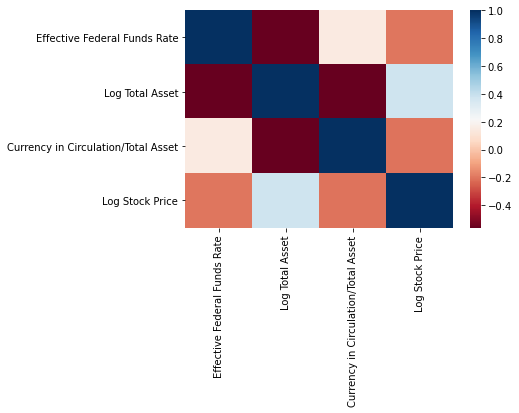

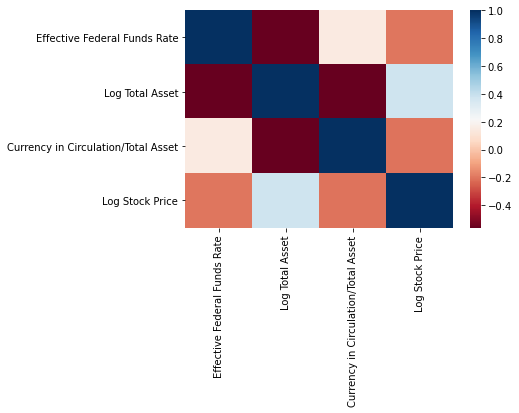

In [62]:
# we will plot a heatmap for visualization of correlation matrix

sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='RdBu')

#RdBu is actually colors= Red, Blue

In [63]:
# get the summary
desc_df = data_new.describe()

# add the standard deviation metric
desc_df.loc['+3_std'] = desc_df.loc['mean'] + (desc_df.loc['std'] * 3)
desc_df.loc['-3_std'] = desc_df.loc['mean'] - (desc_df.loc['std'] * 3)

# display it
desc_df

,Effective Federal Funds Rate,Log Total Asset,Currency in Circulation/Total Asset,Log Stock Price
count,263.000000,263.000000,263.000000,263.000000
mean,1.648517,12.725254,0.517575,7.380284
std,1.887120,5.047217,2.332599,0.421167
min,0.050000,0.000000,0.000000,6.599993
25%,0.130000,13.609582,0.000316,7.066145
50%,1.010000,14.687930,0.000401,7.250259
75%,2.385000,15.294537,0.000932,7.652519
max,6.540000,15.971641,16.000000,8.452727
+3_std,7.309878,27.866907,7.515372,8.643784
-3_std,-4.012844,-2.416398,-6.480222,6.116785


,Effective Federal Funds Rate,Log Total Asset,Currency in Circulation/Total Asset,Log Stock Price
count,263.000000,263.000000,263.000000,263.000000
mean,1.648517,12.725254,0.517575,7.380284
std,1.887120,5.047217,2.332599,0.421167
min,0.050000,0.000000,0.000000,6.599993
25%,0.130000,13.609582,0.000316,7.066145
50%,1.010000,14.687930,0.000401,7.250259
75%,2.385000,15.294537,0.000932,7.652519
max,6.540000,15.971641,16.000000,8.452727
+3_std,7.309878,27.866907,7.515372,8.643784
-3_std,-4.012844,-2.416398,-6.480222,6.116785


In [65]:
# filter the data frame to remove the values exceeding 3 standard deviations
data_remove_df = data_new[(np.abs(stats.zscore(data_new)) < 3).all(axis=1)]

# what rows were removed
data_new.index.difference(data_remove_df.index)

Index(['10/31/2001', '10/31/2002', '12/31/2001', '2/28/2002', '4/30/2002',
       '6/30/2001', '6/30/2002', '8/31/2001', '8/31/2002'],
      dtype='object', name='Date')

Index(['10/31/2001', '10/31/2002', '12/31/2001', '2/28/2002', '4/30/2002',
       '6/30/2001', '6/30/2002', '8/31/2001', '8/31/2002'],
      dtype='object', name='Date')

In [ ]:
# define our input variable (X) & output variable

X = data_updated.drop('Log Stock Price', axis = 1)
Y = data_updated[['Log Stock Price']]

# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

# create a Linear Regression model object
regression_model = LinearRegression()

# pass through the X_train & y_train data set
regression_model.fit(X_train, y_train)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [22]:
data_updated

,DATE,Base: Currency in Circulation ($ Mil),Balance Sheet: Total Assets ($ Mil),Effective Federal Funds Rate,Adj Close
0,1/31/2000,594.68,0.00,5.45,1394.46
1,2/29/2000,566.14,0.00,5.73,1366.42
2,3/31/2000,563.71,0.00,5.85,1498.58
3,4/30/2000,564.73,0.00,6.02,1452.43
4,5/31/2000,565.84,0.00,6.27,1420.60
...,...,...,...,...,...
258,7/31/2021,2186.13,8190356.75,0.10,4395.26
259,8/31/2021,2187.63,8291893.25,0.09,4522.68
260,9/30/2021,2194.90,8418612.40,0.08,4307.54
261,10/31/2021,2202.51,8516524.50,0.08,4605.38


,DATE,Base: Currency in Circulation ($ Mil),Balance Sheet: Total Assets ($ Mil),Effective Federal Funds Rate,Adj Close
0,1/31/2000,594.68,0.00,5.45,1394.46
1,2/29/2000,566.14,0.00,5.73,1366.42
2,3/31/2000,563.71,0.00,5.85,1498.58
3,4/30/2000,564.73,0.00,6.02,1452.43
4,5/31/2000,565.84,0.00,6.27,1420.60
...,...,...,...,...,...
258,7/31/2021,2186.13,8190356.75,0.10,4395.26
259,8/31/2021,2187.63,8291893.25,0.09,4522.68
260,9/30/2021,2194.90,8418612.40,0.08,4307.54
261,10/31/2021,2202.51,8516524.50,0.08,4605.38


In [23]:
data_updated.dtypes # This will show the type of each column

DATE                                      object
Base: Currency in Circulation ($ Mil)    float64
Balance Sheet: Total Assets ($ Mil)      float64
Effective Federal Funds Rate             float64
Adj Close                                float64
dtype: object

DATE                                      object
Base: Currency in Circulation ($ Mil)    float64
Balance Sheet: Total Assets ($ Mil)      float64
Effective Federal Funds Rate             float64
Adj Close                                float64
dtype: object

In [24]:
# set the index to the date column
data_updated = data_updated.set_index('DATE')

In [25]:
data_updated

,Base: Currency in Circulation ($ Mil),Balance Sheet: Total Assets ($ Mil),Effective Federal Funds Rate,Adj Close
DATE,,,,
1/31/2000,594.68,0.00,5.45,1394.46
2/29/2000,566.14,0.00,5.73,1366.42
3/31/2000,563.71,0.00,5.85,1498.58
4/30/2000,564.73,0.00,6.02,1452.43
5/31/2000,565.84,0.00,6.27,1420.60
...,...,...,...,...
7/31/2021,2186.13,8190356.75,0.10,4395.26
8/31/2021,2187.63,8291893.25,0.09,4522.68
9/30/2021,2194.90,8418612.40,0.08,4307.54


,Base: Currency in Circulation ($ Mil),Balance Sheet: Total Assets ($ Mil),Effective Federal Funds Rate,Adj Close
DATE,,,,
1/31/2000,594.68,0.00,5.45,1394.46
2/29/2000,566.14,0.00,5.73,1366.42
3/31/2000,563.71,0.00,5.85,1498.58
4/30/2000,564.73,0.00,6.02,1452.43
5/31/2000,565.84,0.00,6.27,1420.60
...,...,...,...,...
7/31/2021,2186.13,8190356.75,0.10,4395.26
8/31/2021,2187.63,8291893.25,0.09,4522.68
9/30/2021,2194.90,8418612.40,0.08,4307.54


In [26]:
data_updated.dtypes

Base: Currency in Circulation ($ Mil)    float64
Balance Sheet: Total Assets ($ Mil)      float64
Effective Federal Funds Rate             float64
Adj Close                                float64
dtype: object

Base: Currency in Circulation ($ Mil)    float64
Balance Sheet: Total Assets ($ Mil)      float64
Effective Federal Funds Rate             float64
Adj Close                                float64
dtype: object

In [27]:
data_updated.isnull().sum()

Base: Currency in Circulation ($ Mil)    0
Balance Sheet: Total Assets ($ Mil)      0
Effective Federal Funds Rate             0
Adj Close                                0
dtype: int64

Base: Currency in Circulation ($ Mil)    0
Balance Sheet: Total Assets ($ Mil)      0
Effective Federal Funds Rate             0
Adj Close                                0
dtype: int64

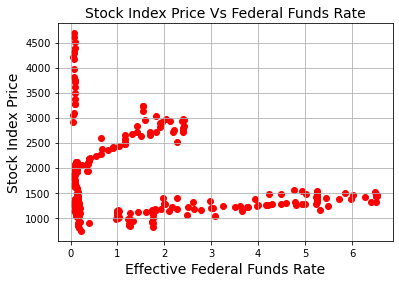

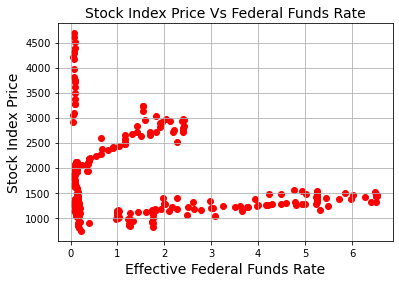

In [28]:
plt.scatter(data_updated['Effective Federal Funds Rate'], data_updated['Adj Close'], color='Red')
plt.title('Stock Index Price Vs Federal Funds Rate', fontsize=14)
plt.xlabel('Effective Federal Funds Rate', fontsize=14)
plt.ylabel('Stock Index Price', fontsize=14)
plt.grid(True)
plt.show()

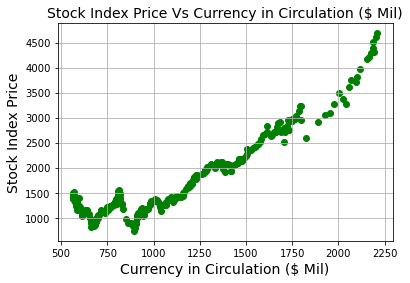

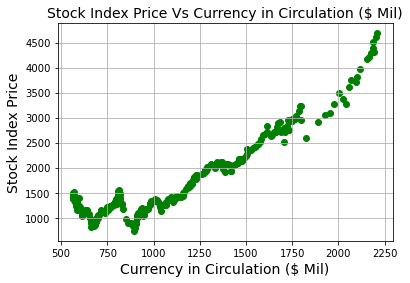

In [29]:
plt.scatter(data_updated['Base: Currency in Circulation ($ Mil)'], data_updated['Adj Close'], color='Green')
plt.title('Stock Index Price Vs Currency in Circulation ($ Mil)', fontsize=14)
plt.xlabel('Currency in Circulation ($ Mil)', fontsize=14)
plt.ylabel('Stock Index Price', fontsize=14)
plt.grid(True)
plt.show()

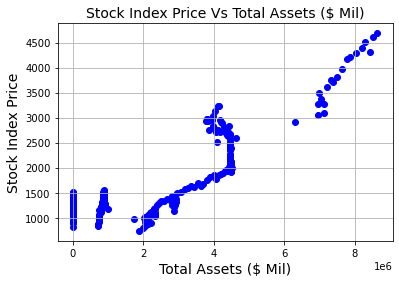

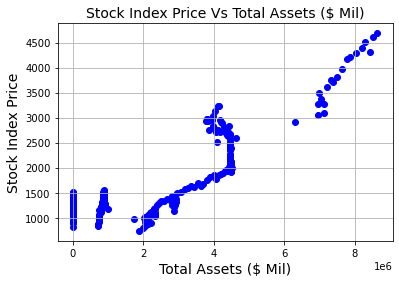

In [30]:
plt.scatter(data_updated['Balance Sheet: Total Assets ($ Mil)'], data_updated['Adj Close'], color='Blue')
plt.title('Stock Index Price Vs Total Assets ($ Mil)', fontsize=14)
plt.xlabel('Total Assets ($ Mil)', fontsize=14)
plt.ylabel('Stock Index Price', fontsize=14)
plt.grid(True)
plt.show()

In [31]:
# to check the correlationship

corr = data_updated.corr()
print(corr)

                                       Base: Currency in Circulation ($ Mil)  \
Base: Currency in Circulation ($ Mil)                               1.000000   
Balance Sheet: Total Assets ($ Mil)                                 0.960467   
Effective Federal Funds Rate                                       -0.487520   
Adj Close                                                           0.936308   

                                       Balance Sheet: Total Assets ($ Mil)  \
Base: Currency in Circulation ($ Mil)                             0.960467   
Balance Sheet: Total Assets ($ Mil)                               1.000000   
Effective Federal Funds Rate                                     -0.608362   
Adj Close                                                         0.871145   

                                       Effective Federal Funds Rate  Adj Close  
Base: Currency in Circulation ($ Mil)                     -0.487520   0.936308  
Balance Sheet: Total Assets ($ Mil)           

<AxesSubplot:>

<AxesSubplot:>

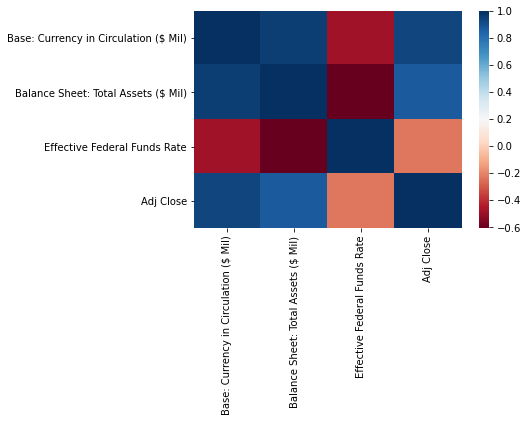

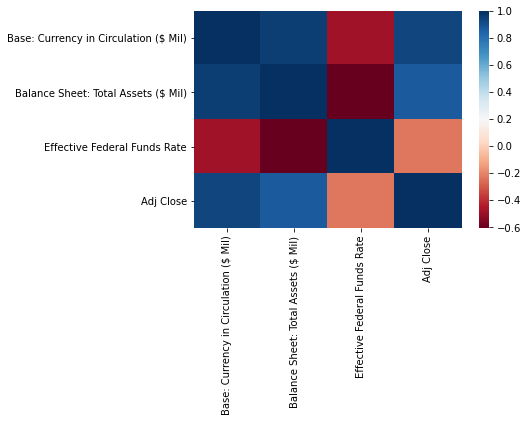

In [32]:
# we will plot a heatmap for visualization of correlation matrix

sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='RdBu')

#RdBu is actually colors= Red, Blue

Describe the Data Set

Before we get to an in-depth exploration of the data or even building the model, we should explore the data a little more and see how the data is distributed and if there are any outliers. I will be adding a few more metrics to the summary data frame, sp that it now includes a metric for three standard deviations below and above the mean.

I'll store my information in a new variable called desc_df.

In [33]:
# get the summary
desc_df = data_updated.describe()

# add the standard deviation metric
desc_df.loc['+3_std'] = desc_df.loc['mean'] + (desc_df.loc['std'] * 3)
desc_df.loc['-3_std'] = desc_df.loc['mean'] - (desc_df.loc['std'] * 3)

# display it
desc_df

,Base: Currency in Circulation ($ Mil),Balance Sheet: Total Assets ($ Mil),Effective Federal Funds Rate,Adj Close
count,263.000000,2.630000e+02,263.000000,263.000000
mean,1123.923536,2.666809e+06,1.648517,1764.247224
std,448.894599,2.142331e+06,1.887120,844.865814
min,563.710000,0.000000e+00,0.050000,735.090000
25%,761.675000,8.138925e+05,0.130000,1171.625000
50%,978.910000,2.392692e+06,1.010000,1408.470000
75%,1454.255000,4.388674e+06,2.385000,2105.945000
max,2210.160000,8.637653e+06,6.540000,4687.840000
+3_std,2470.607333,9.093802e+06,7.309878,4298.844666
-3_std,-222.760261,-3.760184e+06,-4.012844,-770.350217


,Base: Currency in Circulation ($ Mil),Balance Sheet: Total Assets ($ Mil),Effective Federal Funds Rate,Adj Close
count,263.000000,2.630000e+02,263.000000,263.000000
mean,1123.923536,2.666809e+06,1.648517,1764.247224
std,448.894599,2.142331e+06,1.887120,844.865814
min,563.710000,0.000000e+00,0.050000,735.090000
25%,761.675000,8.138925e+05,0.130000,1171.625000
50%,978.910000,2.392692e+06,1.010000,1408.470000
75%,1454.255000,4.388674e+06,2.385000,2105.945000
max,2210.160000,8.637653e+06,6.540000,4687.840000
+3_std,2470.607333,9.093802e+06,7.309878,4298.844666
-3_std,-222.760261,-3.760184e+06,-4.012844,-770.350217


In [34]:
# filter the data frame to remove the values exceeding 3 standard deviations
data_remove_df = data_updated[(np.abs(stats.zscore(data_updated)) < 3).all(axis=1)]

# what rows were removed
data_updated.index.difference(data_remove_df.index)

Index(['10/31/2021', '11/30/2021', '6/30/2021', '7/31/2021', '8/31/2021',
       '9/30/2021'],
      dtype='object', name='DATE')

Index(['10/31/2021', '11/30/2021', '6/30/2021', '7/31/2021', '8/31/2021',
       '9/30/2021'],
      dtype='object', name='DATE')

Build the Model
Now that we've loaded, cleaned, and explored the data we can proceed to the next part, building the model. The first thing we need to do is, define our exploratory variables and our explanatory variable. From here, let's split the data into a training and testing set; 

After splitting the data, we will create an instance of the linear regression model and pass through the X_train and y_train variables using the fit() function.

In [35]:
# define our input variable (X) & output variable

X = data_updated.drop('Adj Close', axis = 1)
Y = data_updated[['Adj Close']]

# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

# create a Linear Regression model object
regression_model = LinearRegression()

# pass through the X_train & y_train data set
regression_model.fit(X_train, y_train)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

LinearRegression()

LinearRegression()


Exploring the Output
With the data now fitted to the model, we can explore the output. The first thing we should do is look at the intercept of the model, and then we will print out each of the coefficients of the model. I print everything out using a loop to make it more efficient.

In [36]:
# let's grab the coefficient of our model and the intercept
intercept = regression_model.intercept_[0]
coefficent = regression_model.coef_[0][0]

print("The intercept for our model is {:.4}".format(intercept))
print('-'*100)

# loop through the dictionary and print the data
for coef in zip(X.columns, regression_model.coef_[0]):
    print("The Coefficient for {} is {:.2}".format(coef[0],coef[1]))

The intercept for our model is -503.7
----------------------------------------------------------------------------------------------------
The Coefficient for Base: Currency in Circulation ($ Mil) is 1.5
The Coefficient for Balance Sheet: Total Assets ($ Mil) is 0.00011
The Coefficient for Effective Federal Funds Rate is 1.5e+02
The intercept for our model is -503.7
----------------------------------------------------------------------------------------------------
The Coefficient for Base: Currency in Circulation ($ Mil) is 1.5
The Coefficient for Balance Sheet: Total Assets ($ Mil) is 0.00011
The Coefficient for Effective Federal Funds Rate is 1.5e+02


#predict the value

We can also now make predictions with our newly trained model. The process is simple; we call the predict method and then pass through some values. In this case, we have some values predefined with the x_test variable so we will pass that through. Once we do that, we can select the predictions by slicing the array.

In [37]:
# Get multiple predictions
y_predict = regression_model.predict(X_test)

# Show the first 5 predictions
y_predict[:5]

array([[1494.50079685],
       [1306.2550954 ],
       [1753.24193134],
       [1965.78240984],
       [ 824.73008724]])

array([[1494.50079685],
       [1306.2550954 ],
       [1753.24193134],
       [1965.78240984],
       [ 824.73008724]])

## Section Six: Evaluating the Model

To make diagnosing the model easier, we will, from this point forward, be using the statsmodel module. This module has built-in functions that will make calculating metrics quick. However, we will need "rebuild" our model using the statsmodel module. We do this by creating a constant variable, call the OLS() method and then the fit() method. We now have a new model, and the first thing we need to do is to make sure that the assumptions of our model hold. This means checking the following:

Regression residuals must be normally distributed.

The residuals are homoscedastic

Absence of multicollinearity (we did this above).

No Autocorrelation.

In [38]:
# define our intput
X2 = sm.add_constant(X)

# create a OLS model
model = sm.OLS(Y, X2)

# fit the data
est = model.fit()

## Checking for Heteroscedasticity

What is Heteroscedasticity?
One of the assumptions of our model is that there is no heteroscedasticity. What exactly does this mean? Well, to give a simple definition it merely means the standard errors of a variable, monitored over a specific amount of time, are non-constant. Let's imagine a situation where heteroscedasticity could exist.

Imagine we modeled household consumption based on income, something we would probably notice is how the variability of expenditures changes depending on how much income you have. In simple terms, we would see that households with more income spend money on a broader set of items compared to lower income households that would only be able to focus on the main staples. This results in standard errors that change over income levels.



What is the problem with heteroscedasticity?
There are two big reasons why you want homoscedasticity:

While heteroscedasticity does not cause bias in the coefficient estimates, it causes the coefficient estimates to be less precise. The Lower precision increases the likelihood that the coefficient estimates are further from the correct population value.

Heteroscedasticity tends to produce p-values that are smaller than they should be. This effect occurs because heteroscedasticity increases the variance of the coefficient estimates, but the OLS procedure does not detect this increase. Consequently, OLS calculates the t-values and F-values using an underestimated amount of variance. This problem can lead you to conclude that a model term is statistically significant when it is not significant.

|| How to test for heteroscedasticity? ||

To check for heteroscedasticity, we can leverage the statsmodels.stats.diagnostic module. This module will give us to a few test functions we can run, the Breusch-Pagan and the White test for heteroscedasticity. The Breusch-Pagan is a more general test for heteroscedasticity while the White test is a unique case.

The null hypothesis for the Breusch-Pagan test is that the variances for the errors are equal:
H0 = σ2i = σ2
The alternate hypothesis is that the variances are not equal:
H1 = σ2i ≠ σ2
Our goal is to fail to reject the null hypothesis, have a high p-value because that means we have no heteroscedasticity.

In [39]:
_, pval, __, f_pval = diag.het_breuschpagan(est.resid, est.model.exog)
print(pval, f_pval)
print('-'*100)

# print the results of the test
if pval > 0.05:
    print("For the Breusch-Pagan's Test")
    print("The p-value was {:.4}".format(pval))
    print("We fail to reject the null hypthoesis, so there is no heterosecdasticity.")

else:
    print("For the Breusch-Pagan's Test")
    print("The p-value was {:.4}".format(pval))
    print("We reject the null hypthoesis, so there is heterosecdasticity.")

4.430660977000215e-06 2.518672216017084e-06
----------------------------------------------------------------------------------------------------
For the Breusch-Pagan's Test
The p-value was 4.431e-06
We reject the null hypthoesis, so there is heterosecdasticity.
4.430660977000215e-06 2.518672216017084e-06
----------------------------------------------------------------------------------------------------
For the Breusch-Pagan's Test
The p-value was 4.431e-06
We reject the null hypthoesis, so there is heterosecdasticity.


The number of lags will be 10
----------------------------------------------------------------------------------------------------
The lowest p-value found was 1.026e-191
We reject the null hypthoesis, so there is autocorrelation.
----------------------------------------------------------------------------------------------------
The number of lags will be 10
----------------------------------------------------------------------------------------------------
The lowest p-value found was 1.026e-191
We reject the null hypthoesis, so there is autocorrelation.
----------------------------------------------------------------------------------------------------


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\stats\diagnostic.py:559: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


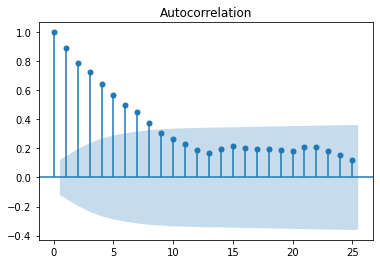

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\stats\diagnostic.py:559: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


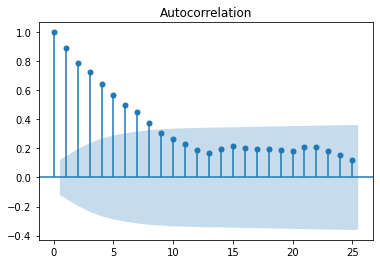

In [40]:
# test for autocorrelation
from statsmodels.stats.stattools import durbin_watson

# calculate the lag, optional
lag = min(10, (len(X)//5))
print('The number of lags will be {}'.format(lag))
print('-'*100)

# run the Ljung-Box test for no autocorrelation of residuals
# test_results = diag.acorr_breusch_godfrey(est, nlags = lag, store = True)
test_results = diag.acorr_ljungbox(est.resid, lags = lag)

# grab the p-values and the test statistics
ibvalue, p_val = test_results

# print the results of the test
if min(p_val) > 0.05:
    print("The lowest p-value found was {:.4}".format(min(p_val)))
    print("We fail to reject the null hypthoesis, so there is no autocorrelation.")
    print('-'*100)
else:
    print("The lowest p-value found was {:.4}".format(min(p_val)))
    print("We reject the null hypthoesis, so there is autocorrelation.")
    print('-'*100)

# plot autocorrelation
sm.graphics.tsa.plot_acf(est.resid)
plt.show()

<ipython-input-41-3389e7f79564>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(int(val )) + "%" for val in ax.get_yticks()], c = "C0")
<ipython-input-41-3389e7f79564>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels([str(int(val)) + "%" for val in ax2.get_yticks()], c = "C1")
<ipython-input-41-3389e7f79564>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_yticklabels(ax3.get_yticks(), alpha = .2, c = "k")


Text(2002-10-10 00:00:00, 0, '0')

<ipython-input-41-3389e7f79564>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(int(val )) + "%" for val in ax.get_yticks()], c = "C0")
<ipython-input-41-3389e7f79564>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels([str(int(val)) + "%" for val in ax2.get_yticks()], c = "C1")
<ipython-input-41-3389e7f79564>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_yticklabels(ax3.get_yticks(), alpha = .2, c = "k")


Text(2002-10-10 00:00:00, 0, '0')

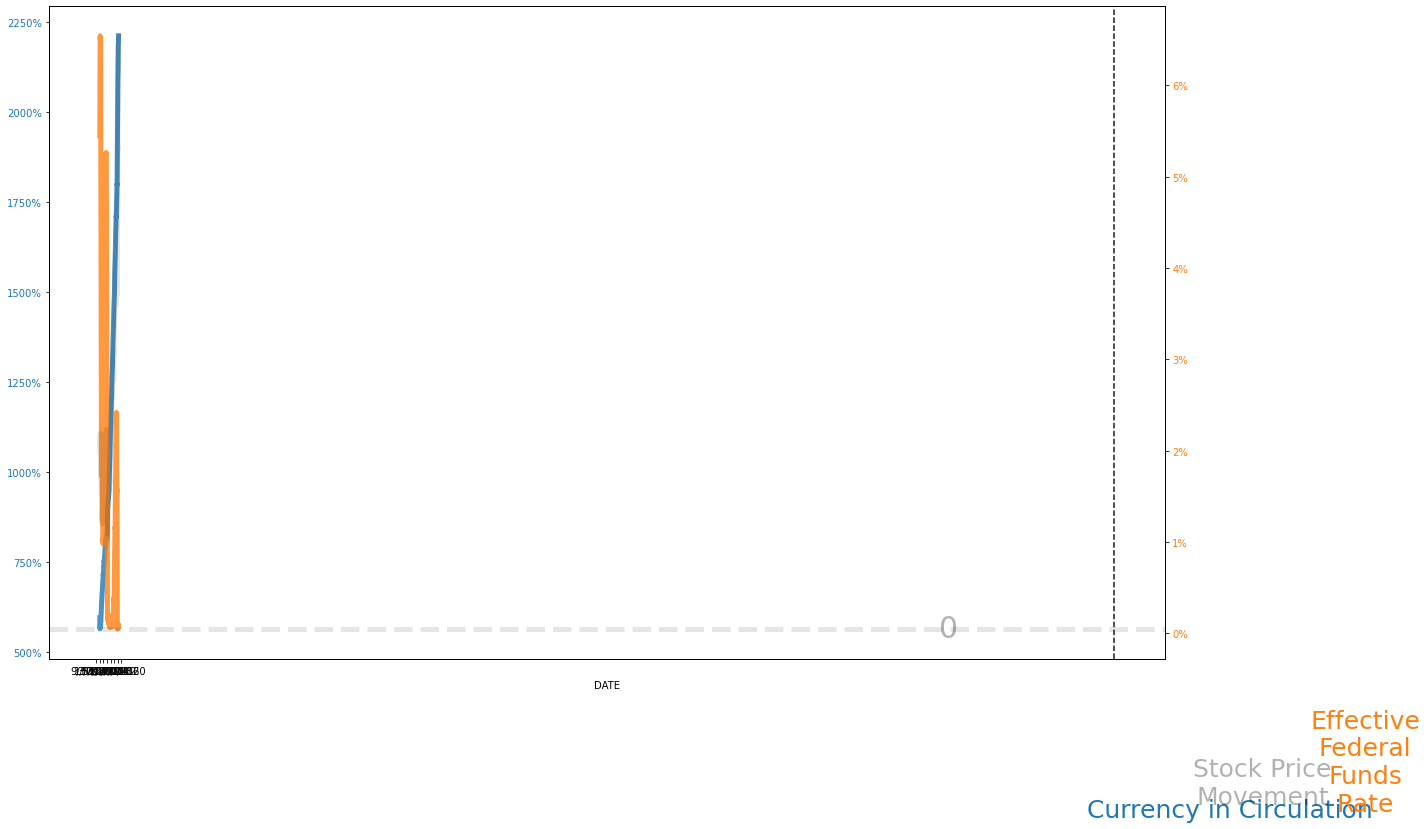

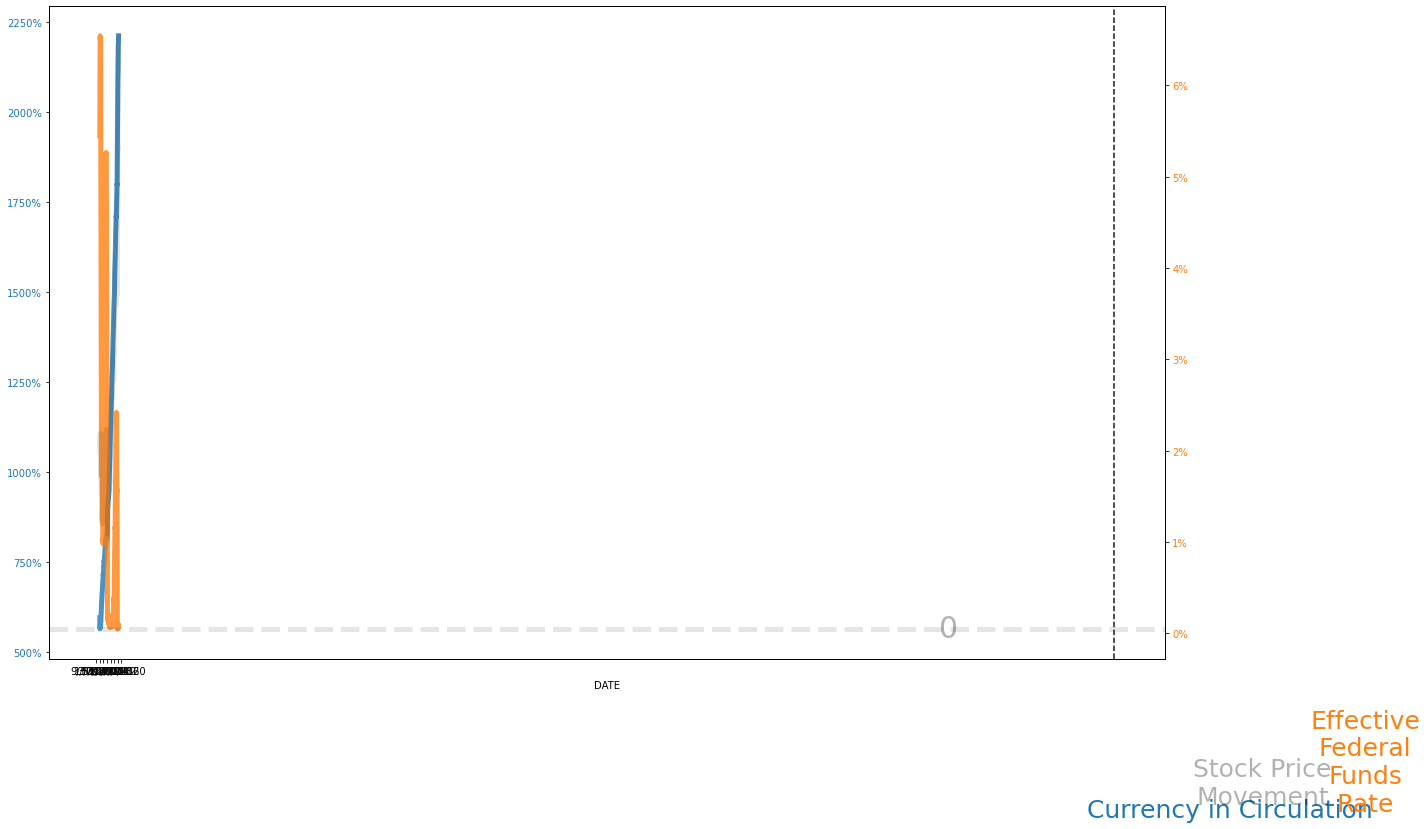

In [41]:
figsize = (20,12)
fig,ax = plt.subplots(figsize = figsize)

ax2 = ax.twinx()
ax3 = ax.twinx()
data_updated[["Base: Currency in Circulation ($ Mil)"]].plot(legend = False, 
                                                      linewidth = 5, 
                                                      alpha = .8,
                                                      ax = ax)
data_updated[["Effective Federal Funds Rate"]].plot(legend = False, 
                                                      linewidth = 5, 
                                                      alpha = .8,
                                                      ax = ax2,
                                                        c = "C1")
data_updated[["Adj Close"]].iloc[:-1].plot(legend = False, 
                                                      linewidth = 5, 
                                                      alpha = .1,
                                                      ax = ax3,
                                                        c = "k")

ax.set_yticklabels([str(int(val )) + "%" for val in ax.get_yticks()], c = "C0")
ax2.set_yticklabels([str(int(val)) + "%" for val in ax2.get_yticks()], c = "C1")
ax3.set_yticklabels(ax3.get_yticks(), alpha = .2, c = "k")
ax3.set_yticks([])

ax3.axhline(0, c = "k", alpha = .1, linewidth = 5, ls = "--")

plt.axvline(datetime.datetime(2008,10,1), c = "k", ls = "--", alpha = .9)
ax.text(datetime.datetime(2013,3,1), 42, "Currency in Circulation", fontsize = 25, c = "C0", 
        ha = "center")
ax.text(datetime.datetime(2018,5,1), 58, "Effective\nFederal\nFunds\nRate", fontsize = 25, c = "C1", 
        ha = "center")
ax.text(datetime.datetime(2014,6,1), 78, "Stock Price\nMovement", fontsize = 25, c = "k", alpha = .3, 
        ha = "center")
ax3.text(datetime.datetime(2002,10,10), 0, "0", va = "center", fontsize = 30, c = "k", alpha = .3, 
        ha = "right")
# ax3.text(datetime.datetime.today(), 0, "0 ",va = "center", fontsize = 30, c = "k", alpha = .3, 
#         ha = "left")

In [42]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.api import VAR
import statsmodels.api as sm
import copy
import pingouin
from scipy.stats import pearsonr
from datlib.ts_tests import *
from statsmodels.tsa.adfvalues import *
import warnings
warnings.simplefilter("ignore")
import statsmodels
statsmodels.__file__

'C:\\Users\\HP\\anaconda3\\lib\\site-packages\\statsmodels\\__init__.py'

'C:\\Users\\HP\\anaconda3\\lib\\site-packages\\statsmodels\\__init__.py'

In [43]:
def dickey_fuller(data, 
                  key, 
                  lags = 1, 
                  annual_lags = True, 
                  time_trend = False, 
                  constant = True):
    lag_length = lags * year if annual_lags else lags
    test_data = data.copy()
    lag_freq = year if annual_lags else 1 
    test_data[key + " Diff"] = test_data[key].diff(lag_freq)
    lag_var = key + " Lag"
    test_data[lag_var] = test_data[key].shift(lag_freq)
    test_data[key + " Lag Diff"] = test_data[key].diff(lag_freq).shift(lag_freq)
    test_data.dropna(inplace = True)
    y = test_data[[key]]# + " Diff"]]
    X = test_data[[lag_var, key + " Lag Diff"]]
    regression = ""
    if constant:
        X["Constant"] = 1
        regression = "c"
    if time_trend:
        X["Time"] = np.arange(len(test_data[key]))
        regression = regression + "t"
    
    if not constant and not time_trend:
        regression = "nc"
    results = sm.OLS(y, X).fit()
    t = (results.params[0]) / results.cov_params().loc[lag_var, lag_var]
#     pvalue = results.pvalues[0]
    pvalue = mackinnonp(t, regression=regression, N=1, lags = lags)
    critvalues = mackinnoncrit(N=1, regression=regression, nobs=results.nobs)
    critvalues = {"1%" : critvalues[0], "5%" : critvalues[1],
                  "10%" : critvalues[2]}   
    print(key, pvalue)
    return [pvalue]

diffs = ["", " Diff", " Diff-in-Diff"]
# diffs = [" Diff", " Diff-in-Diff"]
rename_dct = {"Effective Federal Funds Rate":"$FFR$",
             "Base: Currency in Circulation":"$C/A$",
#               "Circulation Growth":"$C$",
#              "Assets Growth":"$A$",
              "Total Asset":"$TA$",
             "Adj Close":"SP"}
adf_dct = {}
for diff in diffs:
    # test all variables, include loss fucntion components
    plot_vars_dct = {"ADF": [
        "Effective Federal Funds Rate" +diff + " (%)",
        "Base: Currency in Circulation" + diff,
        "Total Asset" + diff,
        "Adj Close" + diff  ]}
    adf_data_updated = data_updated[plot_vars_dct["ADF"]]#.loc["2008-10-31":"2020-02-29"]
    for key in adf_data_updated:
        for rename_key in rename_dct:
            if rename_key in key:
                dif = diff if "Diff" in key else""
                lag = " Lag" if "Lag" in key else ""
                adf_data_updated.rename(columns={key:rename_dct[rename_key]+dif + lag},
                                inplace = True)
    if diff == "":
        time = False
        constant = True

    if diff == " Diff":
        time = False
        constant = True
    if diff == " Diff-in-Diff":
        time = False
        constant = False
    for key in adf_data:
        adf_dct[key] = dickey_fuller(adf_data, 
                  key,
                  lags = 1,
                  annual_lags = True, 
                  time_trend = time, 
                  constant = constant) 
        


new_keys = list(rename_dct.values())
width = 2
length = 3
fig, ax = plt.subplots(width,length, figsize = (38,25))
i = 0
j = 0
for key in new_keys:
    
    keys = [k for k in adf_dct if key in k]
    
    adf_df = pd.DataFrame(adf_dct)[keys]
#     adf_df.plot.bar(legend = False)
    adf_df.T.plot.bar(ax = ax[j][i],legend = False)
    xtick_labels = ax[j][i].get_xticks()
    ax[j][i].set_xticklabels([key + diff.replace(" ", "\n").replace("Diff-in-Diff","2-Diff") for diff in diffs])
    i+=1
 
    if i == length:
        i = 0
        j += 1
    if i == 2 and j == 1:
        ax[j][i].set_axis_off()
    fig.suptitle("$H_0:$ $\gamma = 1$\n$Mackinnon$ $p$ $value$", y = .96, fontsize = 60)

KeyError: "['Base: Currency in Circulation', 'Total Asset', 'Effective Federal Funds Rate (%)'] not in index"

KeyError: "['Base: Currency in Circulation', 'Total Asset', 'Effective Federal Funds Rate (%)'] not in index"